In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [54]:
df = pd.read_csv("insurance.csv")

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
df.shape

(1338, 7)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


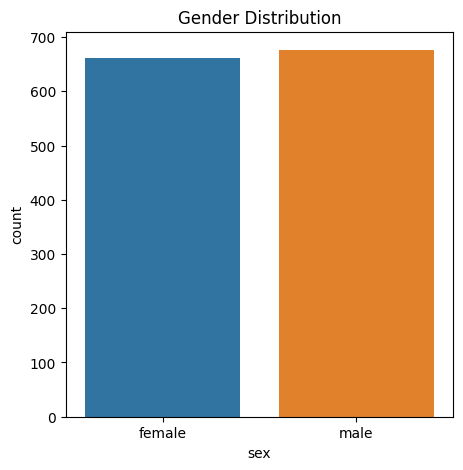

In [61]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

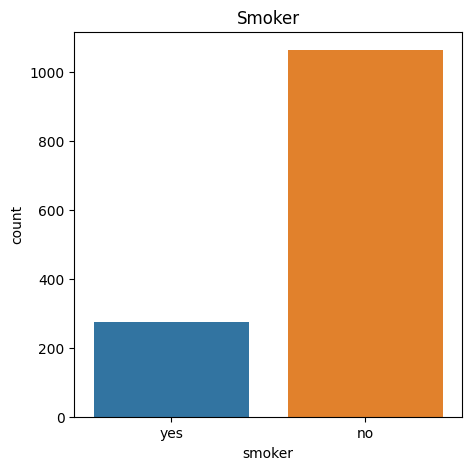

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

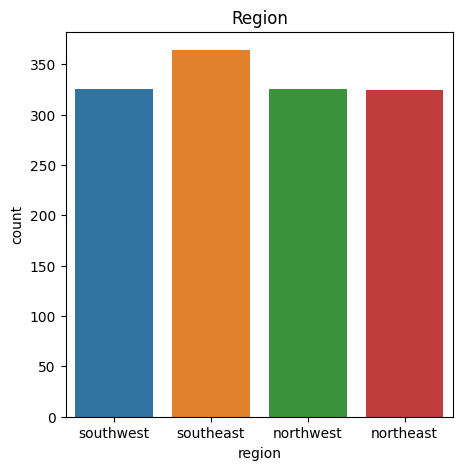

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

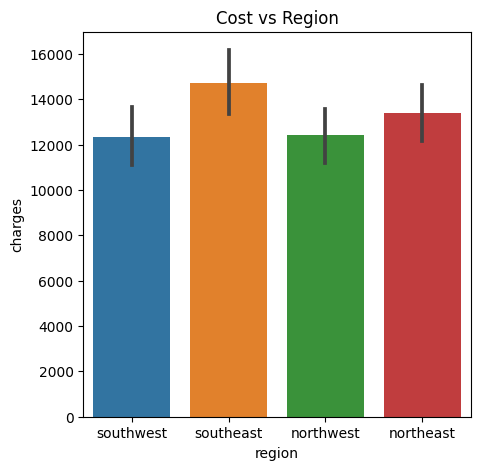

In [64]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

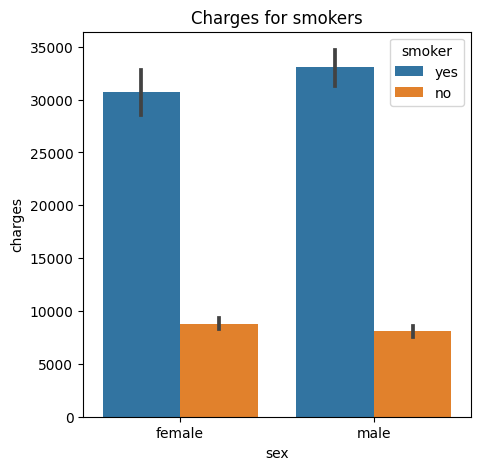

In [65]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

<Axes: xlabel='region', ylabel='charges'>

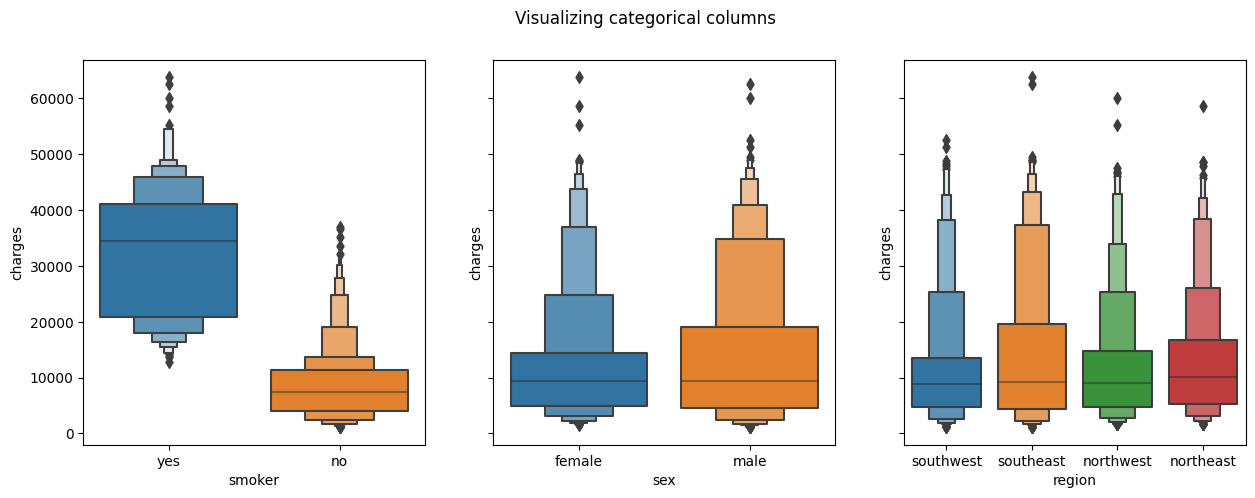

In [66]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=df, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axes[2])

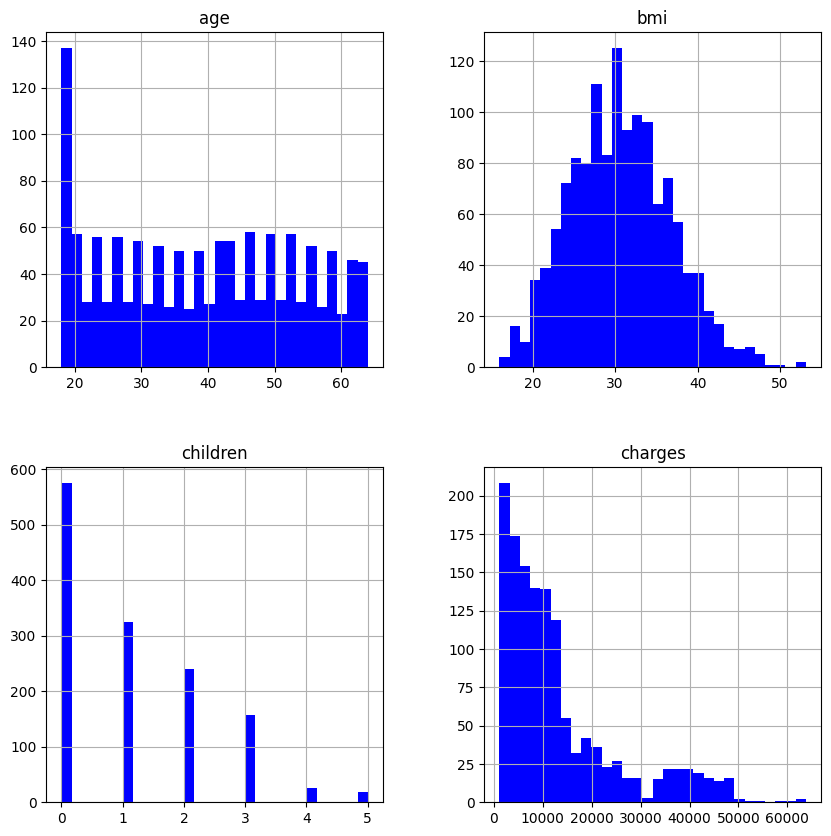

In [67]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [70]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


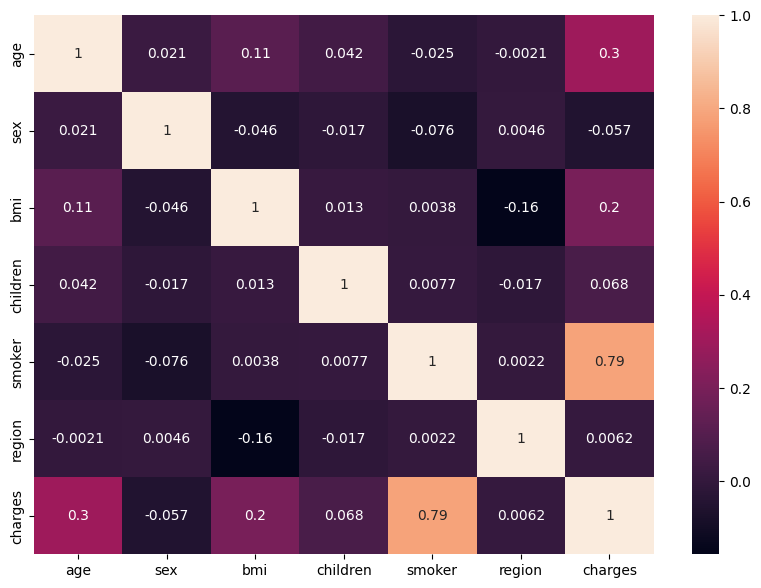

In [71]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

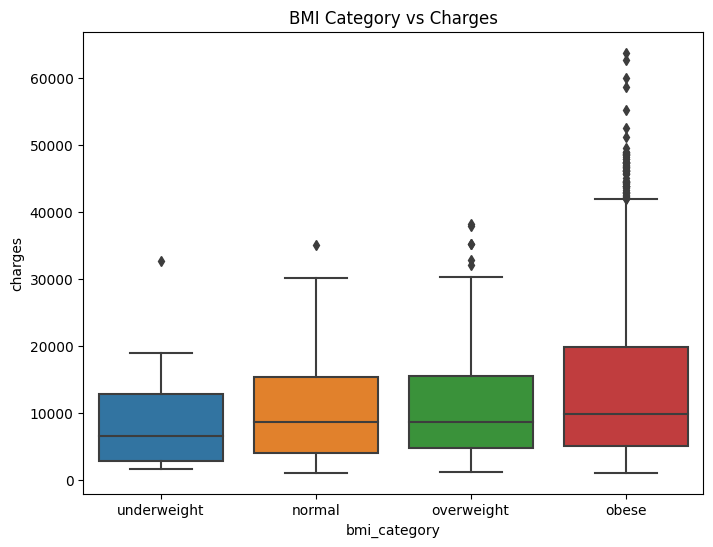

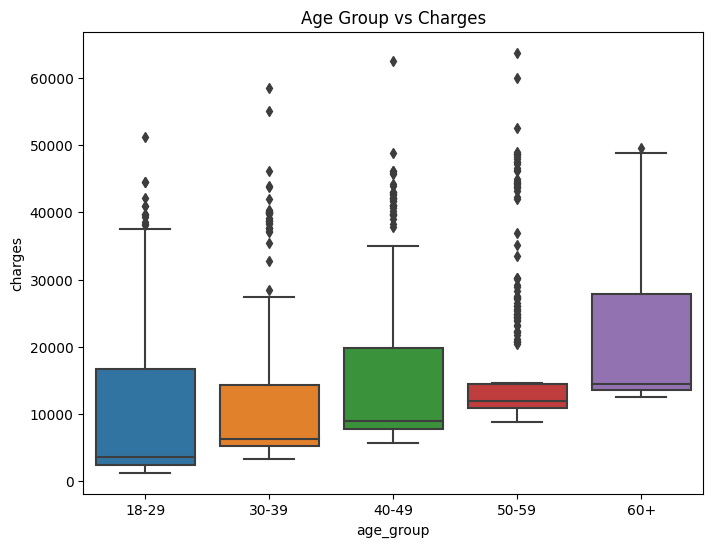

In [72]:
df['age_bmi_interaction'] = df['age'] * df['bmi']
df['smoker_region_interaction'] = df['smoker'] * df['region']

# 2. BMI Categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['underweight', 'normal', 'overweight', 'obese'])

# 3. Age Groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-29', '30-39', '40-49', '50-59', '60+'])

# Visualize new features
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi_category', y='charges', data=df)
plt.title('BMI Category vs Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='age_group', y='charges', data=df)
plt.title('Age Group vs Charges')
plt.show()

In [73]:
X = df.drop(['charges', 'sex'], axis=1)
y = df.charges

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 9)
X_test shape:  (402, 9)
y_train shpae:  (936,)
y_test shape:  (402,)


R2 score:  0.8222746356463899


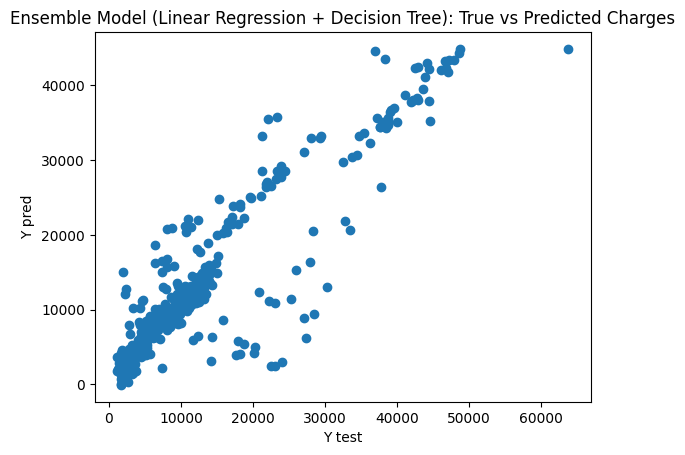

In [75]:
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['smoker', 'region']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with both Linear Regression and Decision Tree Regressor
model = VotingRegressor(estimators=[
    ('linear', Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])),
    ('tree', Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor(random_state=42))]))
])

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

# Visualization (scatter plot)
plt.scatter(y_test, y_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.title('Ensemble Model (Linear Regression + Decision Tree): True vs Predicted Charges')
plt.show()

In [76]:
data = {'age':21, 'bmi':25, 'children':0, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)


In [77]:
# Feature engineering for the new customer
cust_df['age_bmi_interaction'] = cust_df['age'] * cust_df['bmi']
cust_df['smoker_region_interaction'] = cust_df['smoker'] * cust_df['region']
cust_df['bmi_category'] = pd.cut(cust_df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['underweight', 'normal', 'overweight', 'obese'])
cust_df['age_group'] = pd.cut(cust_df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-29', '30-39', '40-49', '50-59', '60+'])

In [78]:
cost_pred = model.predict(cust_df)
print("The medical insurance cost of the new customer is (in usd): ", cost_pred)

The medical insurance cost of the new customer is (in usd):  [21053.79210659]
